# Pymaceuticals Inc.
---

### Analysis

- Overall, Capomulin was successful in reducing tumor sizes in mice tested in this study. It performed second-best in this study, with Ramicane, showing slightly more tumor size reduction on average in mice tested.

- Tumor volume was shown to be largely dependent on the weight of the mice tested (e.g. mice with lower weight had lower tumor volume on average, and vice versa).

- A trend in the data shows that tumor volume reduction peaked in mice treated with Capomulin after 30 days, and rose again for the remaining 15 days of the trial.


 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merged_df[merged_df.duplicated(['Mouse ID','Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merged_df[merged_df['Mouse ID'].isin(duplicate_mice) == False ]


# clean_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep =False).reset_index(drop = True)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
grouped_df = clean_df.copy()
grouped_df = clean_df.groupby(['Drug Regimen'])

mean_tumor = grouped_df['Tumor Volume (mm3)'].mean()
median_tumor = grouped_df['Tumor Volume (mm3)'].median()
variance_tumor = grouped_df['Tumor Volume (mm3)'].var()
std_tumor = grouped_df['Tumor Volume (mm3)'].std()
sem_tumor = grouped_df['Tumor Volume (mm3)'].sem()

total_grouped_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                                 "Median Tumor Volume": median_tumor,
                                 "Variance Tumor Volume": variance_tumor,
                                 "Std Dev Tumor Volume": std_tumor,
                                 "Std Error Tumor Volume": sem_tumor})

total_grouped_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Dev Tumor Volume,Std Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:


# Using the aggregation method, produce the same summary statistics in a single line.
aggregate = grouped_df['Tumor Volume (mm3)'].agg(['mean','median', 'var', 'std', 'sem'])
aggregate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

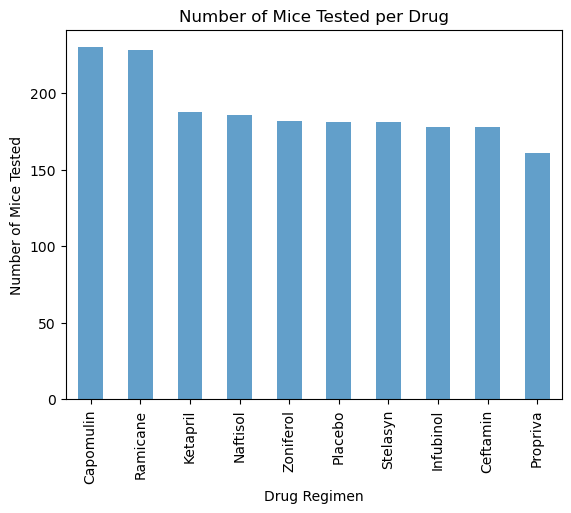

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_tested = clean_df['Drug Regimen'].value_counts()
bar_plot = mice_tested.plot(kind='bar', title="Number of Mice Tested per Drug", alpha=.7)
bar_plot.set_xlabel("Drug Regimen");
bar_plot.set_ylabel("Number of Mice Tested");

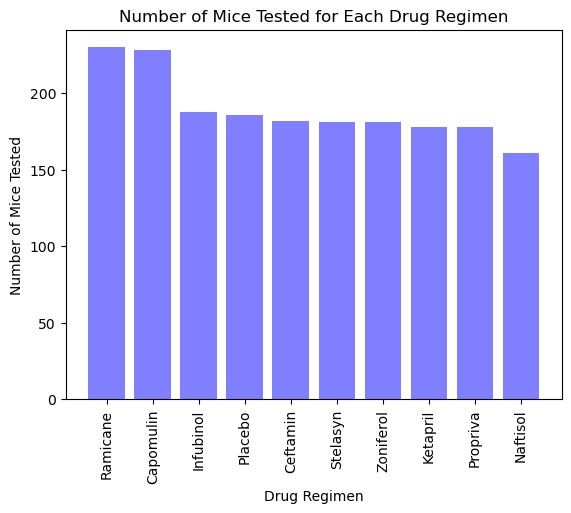

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = clean_df['Drug Regimen'].unique()
mice_tested = clean_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(grouped_df))
tick_locations = [value+.4 for value in x_axis]

plt.xticks(tick_locations, drugs, rotation='vertical')

plt.bar(x_axis, mice_tested, color="b", alpha=.5, align="edge")
plt.title("Number of Mice Tested for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show();




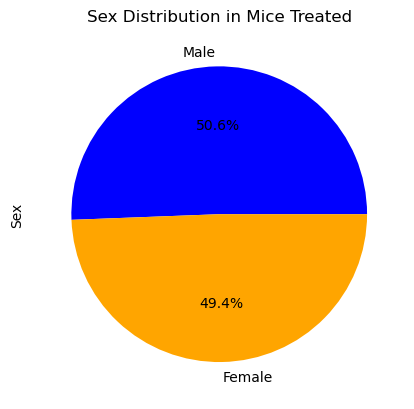

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# The values of each section of the pie chart
values = clean_df['Sex'].value_counts()

# The colors of each section of the pie chart
colors = ["blue", "orange"]

pie_chart_pd = values.plot.pie(y="Mouse ID", title=("Sex Distribution in Mice Treated"), colors = colors ,autopct='%1.1f%%')



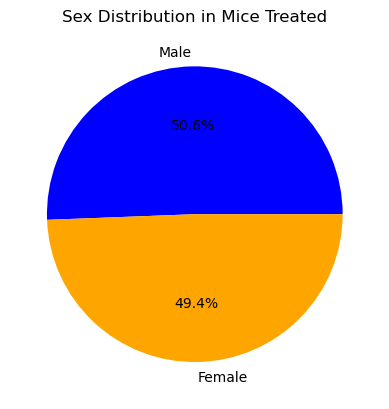

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Sex Distribution in Mice Treated")
plt.show();

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
by_mouse_df = clean_df.groupby('Mouse ID')

last_timepoint = by_mouse_df['Timepoint'].max()
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_final_df = pd.merge(merged_df, last_timepoint, how="inner", on=['Mouse ID','Timepoint'])
tumor_final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_used = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs_used:
    tumor_volume = tumor_final_df.loc[tumor_final_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"For {drug}, values below {lower_bound} and above {upper_bound} are outliers.")

For Capomulin, values below 20.70456164999999 and above 51.83201549 are outliers.
For Ramicane, values below 17.912664470000003 and above 54.30681135 are outliers.
For Infubinol, values below 36.83290494999999 and above 82.74144559000001 are outliers.
For Ceftamin, values below 25.355449580000002 and above 87.66645829999999 are outliers.


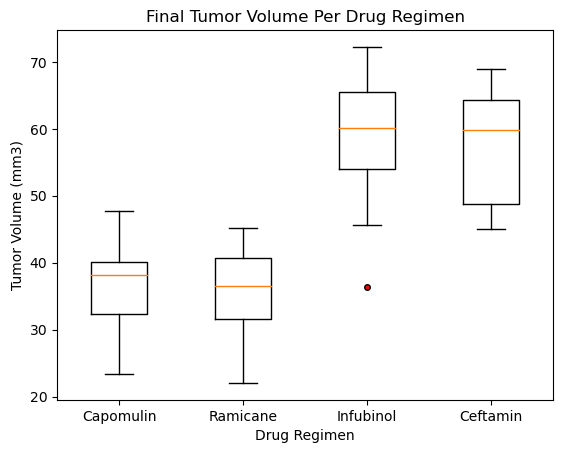

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
outliers_props = dict(marker='o', markerfacecolor='r', markersize=4,
                  linestyle='none')
ax1.boxplot(tumor_list, flierprops=outliers_props)
ax1.set_title('Final Tumor Volume Per Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.xticks([1, 2, 3, 4], drugs_used)
plt.show();

## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
our_drug = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
one_mouse = our_drug[our_drug['Mouse ID'] == 't565']
x_axis = one_mouse['Timepoint']
y_axis = one_mouse['Tumor Volume (mm3)']
one_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
155,t565,Capomulin,Female,20,17,0,45.000000,0
156,t565,Capomulin,Female,20,17,5,45.895647,0
157,t565,Capomulin,Female,20,17,10,46.749006,0
158,t565,Capomulin,Female,20,17,15,44.440949,0
159,t565,Capomulin,Female,20,17,20,39.070214,0
160,t565,Capomulin,Female,20,17,25,37.342210,0
161,t565,Capomulin,Female,20,17,30,32.868916,0
162,t565,Capomulin,Female,20,17,35,33.515671,0
163,t565,Capomulin,Female,20,17,40,33.949341,0
164,t565,Capomulin,Female,20,17,45,34.455298,0


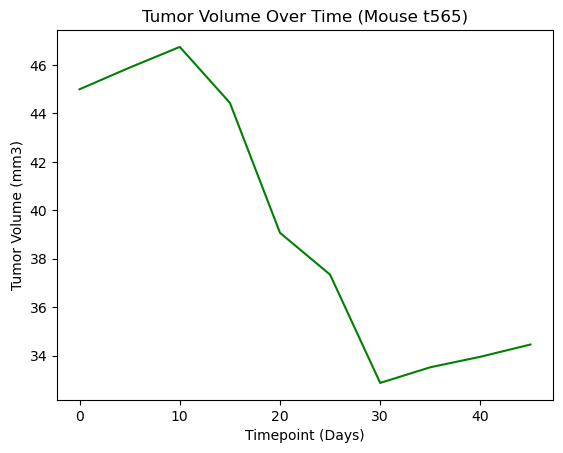

In [19]:
plt.plot(x_axis, y_axis, color="green")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Tumor Volume Over Time (Mouse t565)")
plt.show();


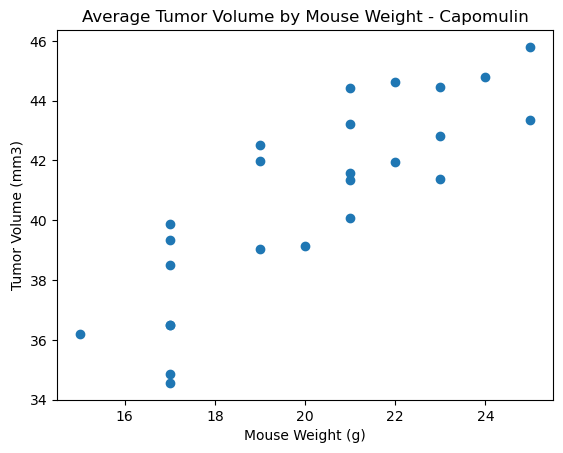

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_mouse = our_drug.groupby(['Mouse ID']).mean()
weight = avg_mouse['Weight (g)']
tumor_vol = avg_mouse['Tumor Volume (mm3)']

plt.scatter(weight, tumor_vol)
plt.title("Average Tumor Volume by Mouse Weight - Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show();


## Correlation and Regression

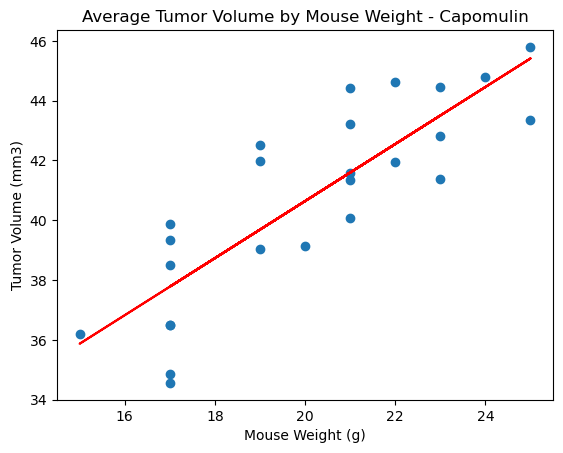

The linear regression equation is y = 0.95x + 21.55
The correlation coefficent is 0.8419


In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight
y_values = tumor_vol

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Average Tumor Volume by Mouse Weight - Capomulin")
plt.show();

# to find p value - pearsonr returns 2 values, p value is the first
correlation = st.pearsonr(x_values, y_values)[0]
rounded_corr = round(correlation, 4)

print(f"The linear regression equation is {line_eq}")
print(f"The correlation coefficent is {rounded_corr}")
